In [23]:
from clipseg.models.clipseg import CLIPDensePredT
from PIL import Image
from torchvision import transforms
from matplotlib import pyplot as plt
import torch

# load model
model = CLIPDensePredT(version='ViT-B/16', reduce_dim=64)
model.eval()

# non-strict, because we only stored decoder weights (not CLIP weights)
model.load_state_dict(torch.load('/home/chenweifeng/image_generation_project/disco_project/clipseg/weights/rd64-uni.pth', map_location=torch.device('cpu')), strict=False)

def clip_seg(input_image, prompt):
    # image = Image.open(image_path)
    transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    transforms.Resize((512, 512)),
    ])
    img = transform(input_image).unsqueeze(0)

    with torch.no_grad():
        preds = model(img, prompt)[0]
    return torch.sigmoid(preds[0][0])

In [32]:
mask = clip_seg(Image.open('/home/chenweifeng/image_generation_project/disco_project/images_out/220925-200821_217023-未来城市.png'), 'grass')

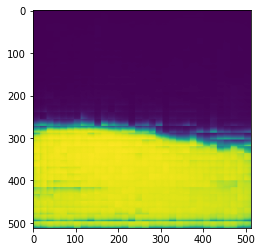

In [33]:
plt.imshow(mask)